# Synestias Obey Conservation of Angular Momentum

Synestias are massive, quickly-rotating bodies with liquid and vapor that extends far from the center of its body. They have high angular momentum (compare this to something). Earth-mass synestias have more angular momentum than the present Earth-Moon system. The high angular momentum in a synestia allows a couple of interesting consequences. The moonlets growing in a synestia move based on exchange of angular momentum with the gas surrounding them. The corotating region of a synestia will spin faster if it accretes more mass from decaying moonlets. Why does this happen? There is one physical law of nature that synestias cannot violate: conservation of angular momentum.

## ...as does everything else in the universe

Everything in the universe must obey the laws of conservation. Physics demands that angular momentum must be conserved in the universe. In other words, angular momentum L does not change with time t such that
$$\frac{dL}{dt} = 0 = \sum \tau = \sum r \times F$$
where there are no external rotational forces (or torques $\tau$, where F is a force that is perpendicular to the rotational axis, a radial distance r away,) acting on a given system. There may be many torques that act summatively on a system, which is indicated by sigma $\sum$, the symbol for sum.

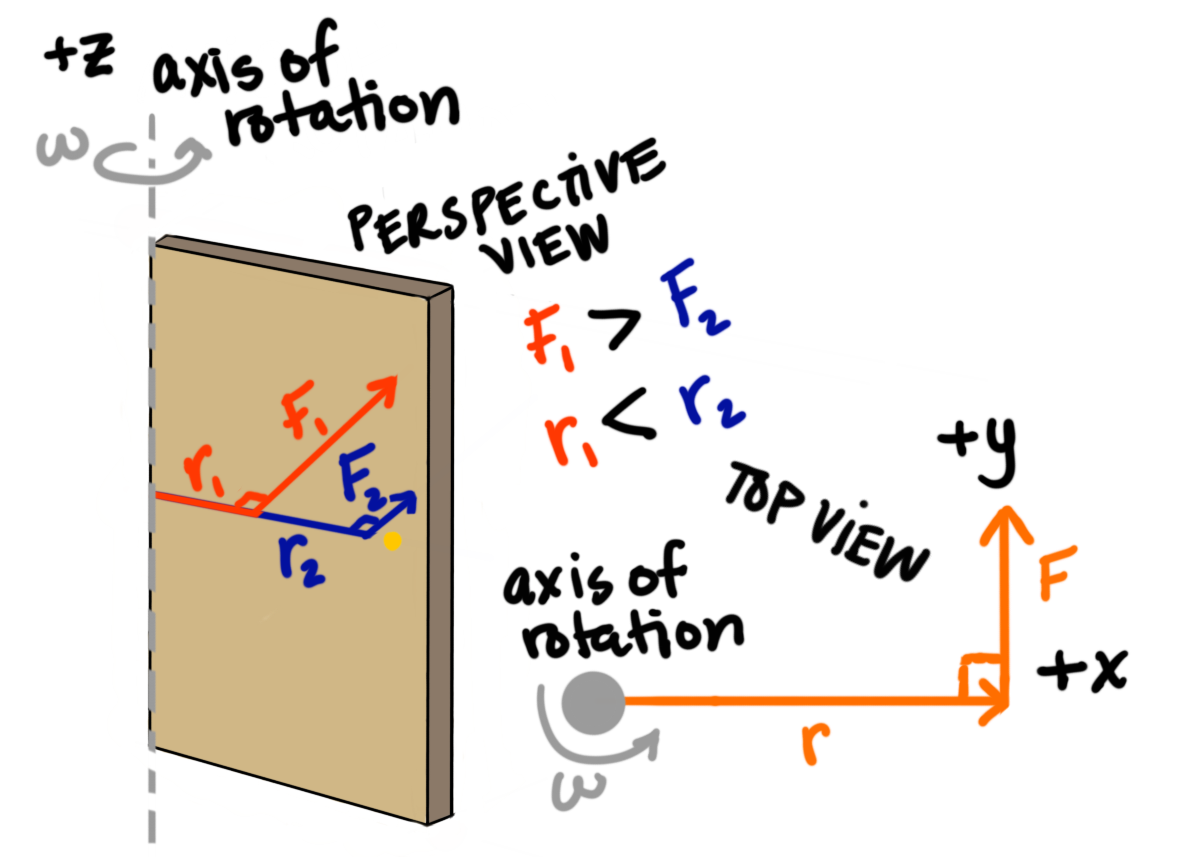

We deal with torques on a daily basis. Every time we open a door, we are exerting a torque on the door handle to swing the door open. Handles on doors are always farthest from the hinges of a door because it requires less effort (force F) on your part if the distance to the axis of rotation r (the vertical line where the hinges of the door meet a wall) is larger. Try this for yourself -- have you noticed how much more difficult it is to open a door when you are pushing on it close to the door's hinges?

If a body or system needs to lose angular momentum, a torque must displace it somehwere else. There is no way to remove angular momentum from the universe. Conversely, there is no way to generate more angular momentum in the universe. Angular momentum is gained by transferring it from somewhere else.

## What is angular momentum?

Angular momentum L is
$$L = r \times p = r \times m v = m r^2 \omega$$
where p is linear momentum (equal to the product of a body's mass m and linear velocity v) and r is the radial distance from the rotational axis to the body. The radius r must be perpendicular to the direction of the body's linear motion. The body has an angular velocity $\omega$ about the rotational axis. Angular momentum is a measure of the resistance of the rotational motion of a body to outside forces. The more massive a body is, the faster the body is moving, and the larger distance from the rotational axis a body is, the more angular momentum the body has. The more angular momentum a body has, the harder it will be to change its angular momentum significantly [e.g. the applied torque (rotational force) to change the body's angular momentum must be greater]. You can think of it as a rotational inertia.

Similar to angular velocity, angular momentum can describe the rotational inertia of either: 1) smaller components within a solid body undergoing rotation or 2) an orbiting body.

<b>Case 1</b>: Solid body rotation

Say a figure skater is spinning with her limbs extended. According to conservation of angular momentum, she must bring her limbs in close to her body in order to spin faster. Her overall mass will not change, so if she wants to increase her rotational velocity, she must reduce the distance between the outermost parts of her body and her rotational axis. A figure skater who is more massive would have greater overall angular momentum, but would still be subject to the same law of conservation.

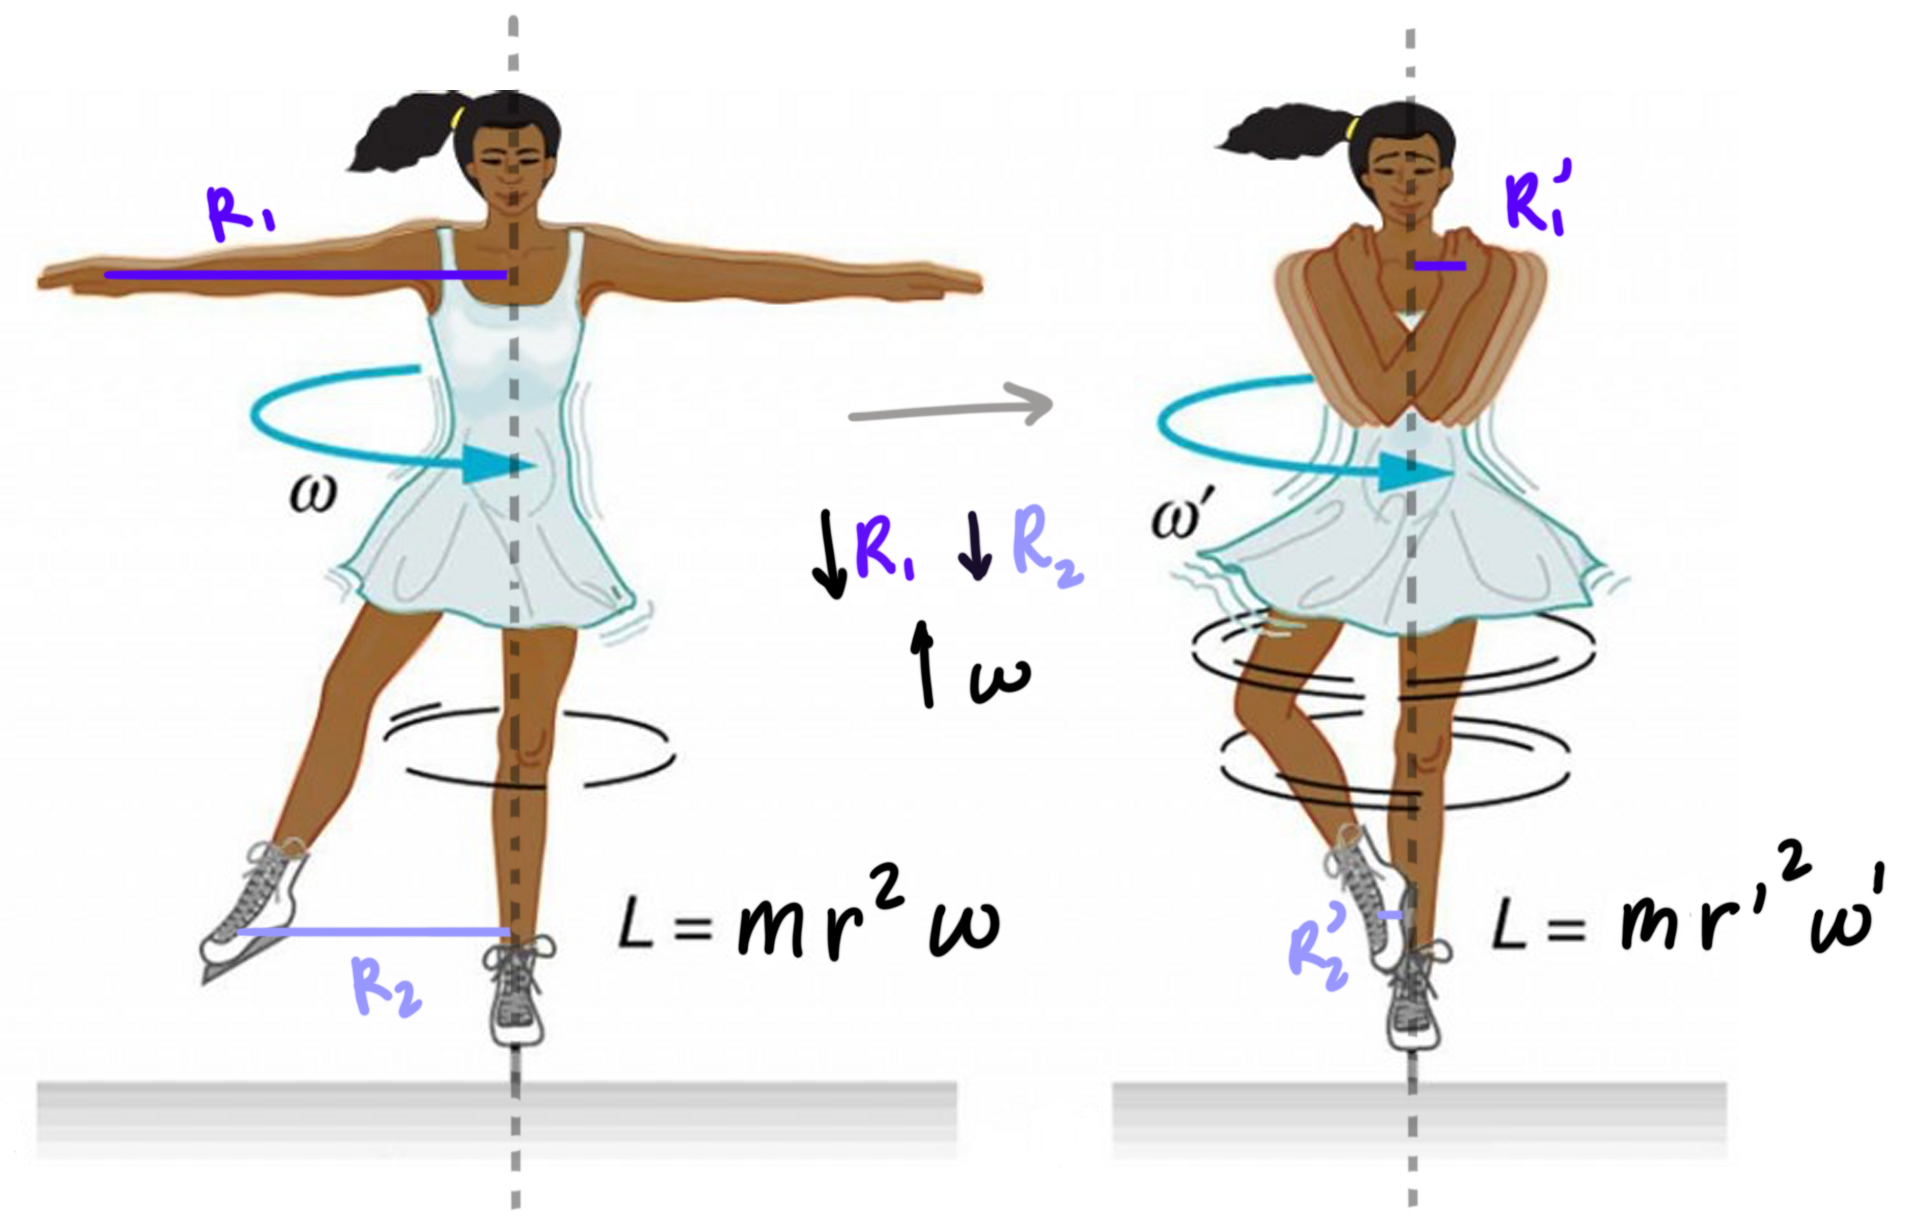

Credit: adapted figure from Nigerian Scholars (2020) Conservation of Angular Momentum in Rotational Motion and Angular Momentum tutorial https://nigerianscholars.com/tutorials/rotational-motion-angular-momentum/conservation-of-angular-momentum/

<b>Case 2</b>: Orbital motion

Elliptical orbits are possible due to conservation of angular momentum. Say a planet is stably orbiting about a central mass (a star). In the farthest part of its eccentric orbit, the planet will transit at its slowest orbital velocity (minimum $\omega$ of orbit) because it is far from its star (large r) and the planet's mass does not change. At the planet's closest approach, the planet will be traveling at its fastest orbital velocity (maximum $\omega$ of orbit) since it is very close to its star (small r) and, again, the planet's mass does not change.

However, if the planet grew as the result of a collision with other planetary material (let's say a planet for now), the planet's total mass will increase. To conserve its angular momentum and maintain a Keplerian orbit, the planet must decrease its orbital radius.

In [54]:
#interactive playing with moon (changing mass, radius, velocity)
import rebound
from ipywidgets import *
import math

#conversions to astronomy system of units
M_sun = 1.99e30 #kg solar mass as central body
au = 1.5e11 #no. of m in 1 au
yr = 365.25*24*3600 #no. of s in 1 yr

AM = 4.5e9 #roughly current AM of Earth in Msun au^2 yr^-1

def pltAM(mass,inclin,ecc):
    mass = mass/M_sun
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun') #use astronomical units
    sma = (AM**2)/(sim.G*M_sun*(mass**2)) #calculate semi-major axis
    sim.add(m=1) #solar mass as central body
    sim.add(m=mass,a=sma,e=ecc,inc=inclin) #add planet
    sim.move_to_com()
    ps=sim.particles
    if mass > (0.5e-3):
        fig,ax,ax2,ax3 = rebound.OrbitPlot(sim,unitlabel="[au]",slices=1)
        limit = 2.*sma
        ax.set_xlim([-limit,limit])
        ax.set_ylim([-limit,limit])
        ax2.set_xlim([-limit,limit])
        ax2.set_ylim([-limit,limit])
        ax3.set_xlim([-limit,limit])
        ax3.set_ylim([-limit,limit])
        print('The planet has an orbital period of {0:.1e} seconds.'.format(ps[1].P*yr))
    else:
        fig = rebound.OrbitPlot(sim,unitlabel="[au]",slices=1)
        print('The planet has an orbital period of {0:.1e} years.'.format(ps[1].P))

style = {'description_width': 'initial'}
layout = {'width': '400px'}
#mass is in kg
interact(pltAM,
        mass = widgets.Dropdown(
             options=[('Asteroid', 1e20),
                      ('Earth', 1e24),
                      ('Jupiter', 1e27)],
             value=1e20, description='Mass of planet (kg)', style=style),
        inclin = FloatSlider(value=0, max=2.*math.pi, step=0.2, description='Inclination of orbit (radians)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
        ecc = FloatSlider(value=0, max=0.9, step=0.1, description='Eccentricity of orbit (unitless)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
        )

interactive(children=(Dropdown(description='Mass of planet (kg)', options=(('Asteroid', 1e+20), ('Earth', 1e+2…

<function __main__.pltAM(mass, inclin, ecc)>

The interactive above maintains the planet's angular momentum. It is currently set to roughly the present-day angular momentum of Earth. Changing the mass of the body significantly affects the orbit's radius, assuming the planetary body maintains a Keplerian orbit.

Note: One astronomical unit (au) is equal to the average orbital distance of Earth to the sun (Earth's semi-major axis = 1 au). The semi-major axes for Mercury, Jupiter, and Pluto are 0.39 au, 5.2 au, and 39.3 au, respectively. It is 2.7 x 10$^7$ au from Earth to the North Star, Polaris. It is 1.6 x 10$^9$ au from Earth to the center of our galaxy, the Milky Way. A distance of .000001 au is about 15 km.

## The Role of Angular Momentum in a Synestia

### During the Synestia-Forming Giant Impact

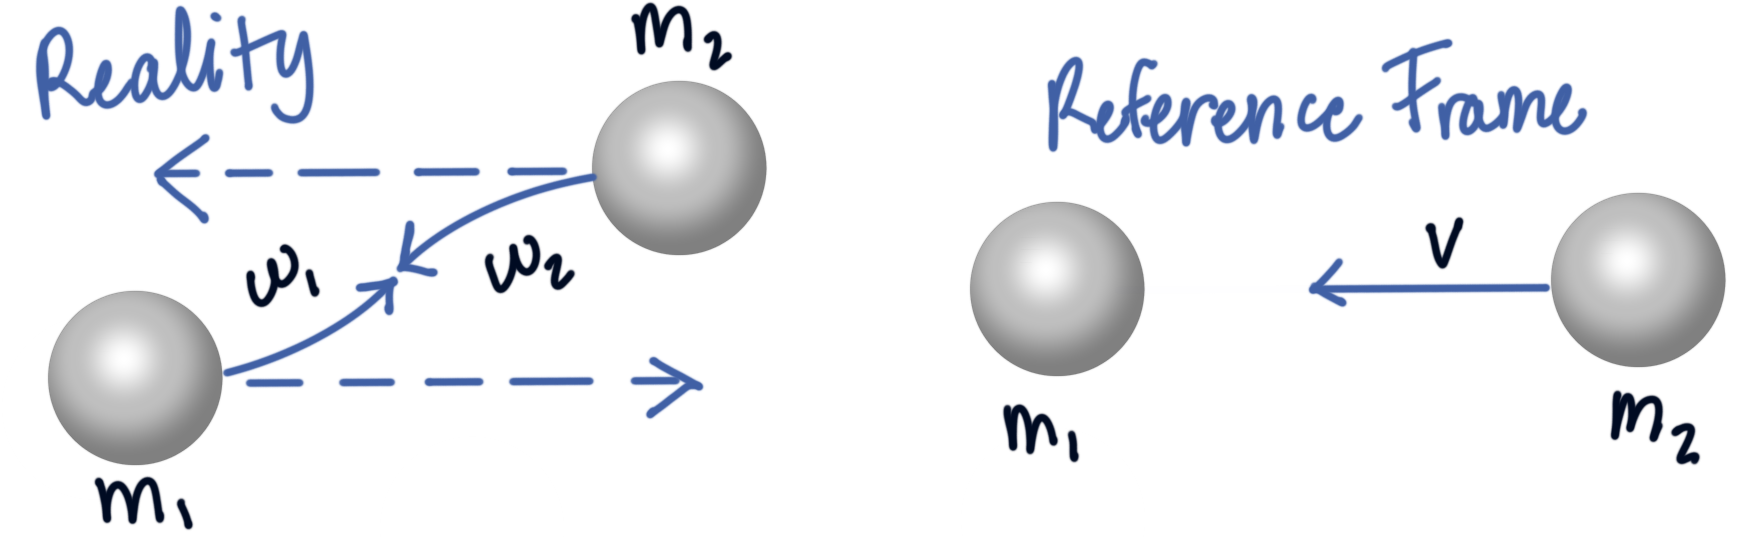

Before a giant impact occurs, the two impacting bodies do not typically approach each other head on. Most of the time, the impacting bodies will hit each other at an angle. These two bodies are known as the target and the impactor. The target is the impacting body that would be stationary if the motion's frame of reference were placed on it. The target body does not move relative to the impactor in that frame of reference. Giant impact researchers use a frame of reference because it makes the physics easier, but they know that in reality, both bodies are both moving. In the frame of reference, it looks like the impactor's motion is linear. Without the frame of reference, it is clear that the impacting bodies both move toward each other due to gravitational attraction and swirl in towards each other. This begins the rotational motion of the system generated from the giant impact.

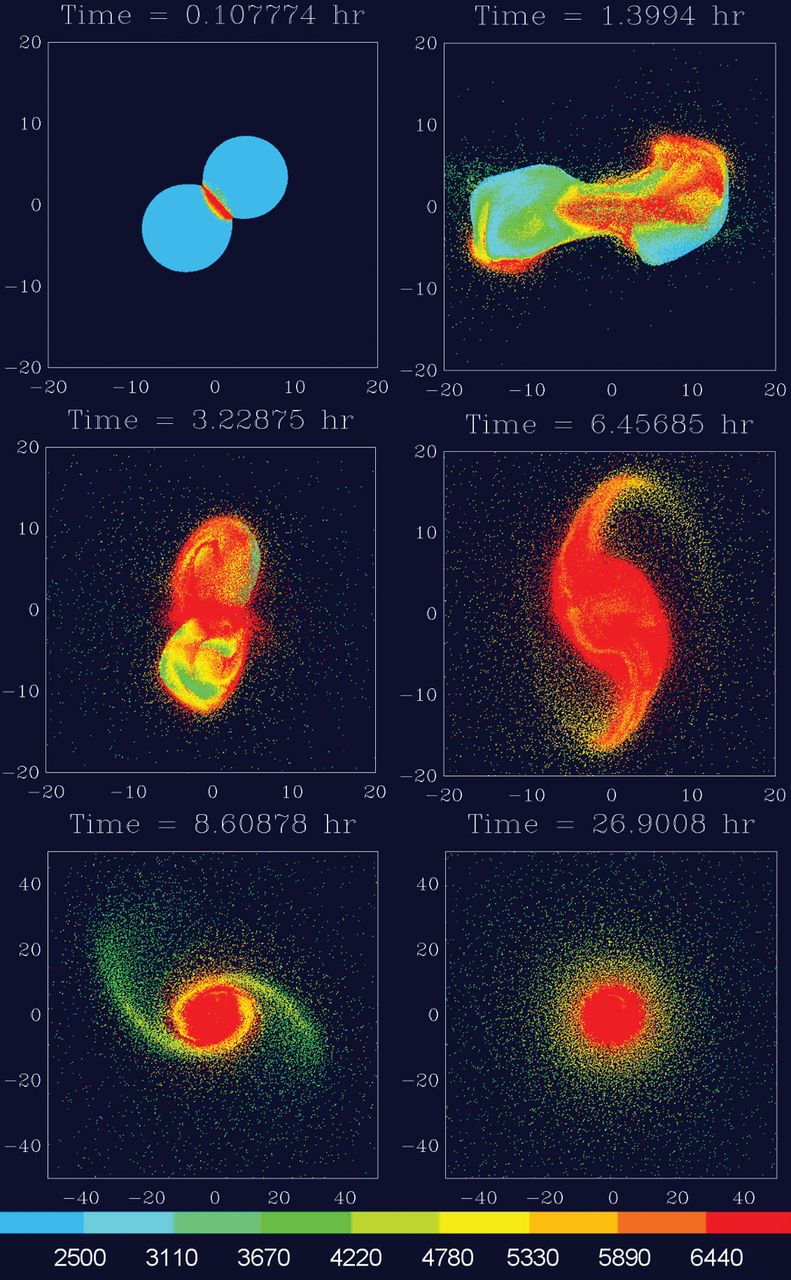

Credit: Canup (2012)

It is because a giant impact causes the impacting bodies to rotate towards each other that the impacting bodies generate angular momentum from the first moment of a giant impact. In response, the giant impact generates an angular momentum arm (seen in figure above) which manipulates the matter of the post-giant-impact system into a swirling disk-like feature. The angular momentum that results from a moon-forming giant impact can be predicted based on the intial mass of the impacting bodies (Canup 2012). The larger the mass of the system, the greater angular momentum the resulting post-giant-impact system will have.

### In a Synestia's Interior Dynamics

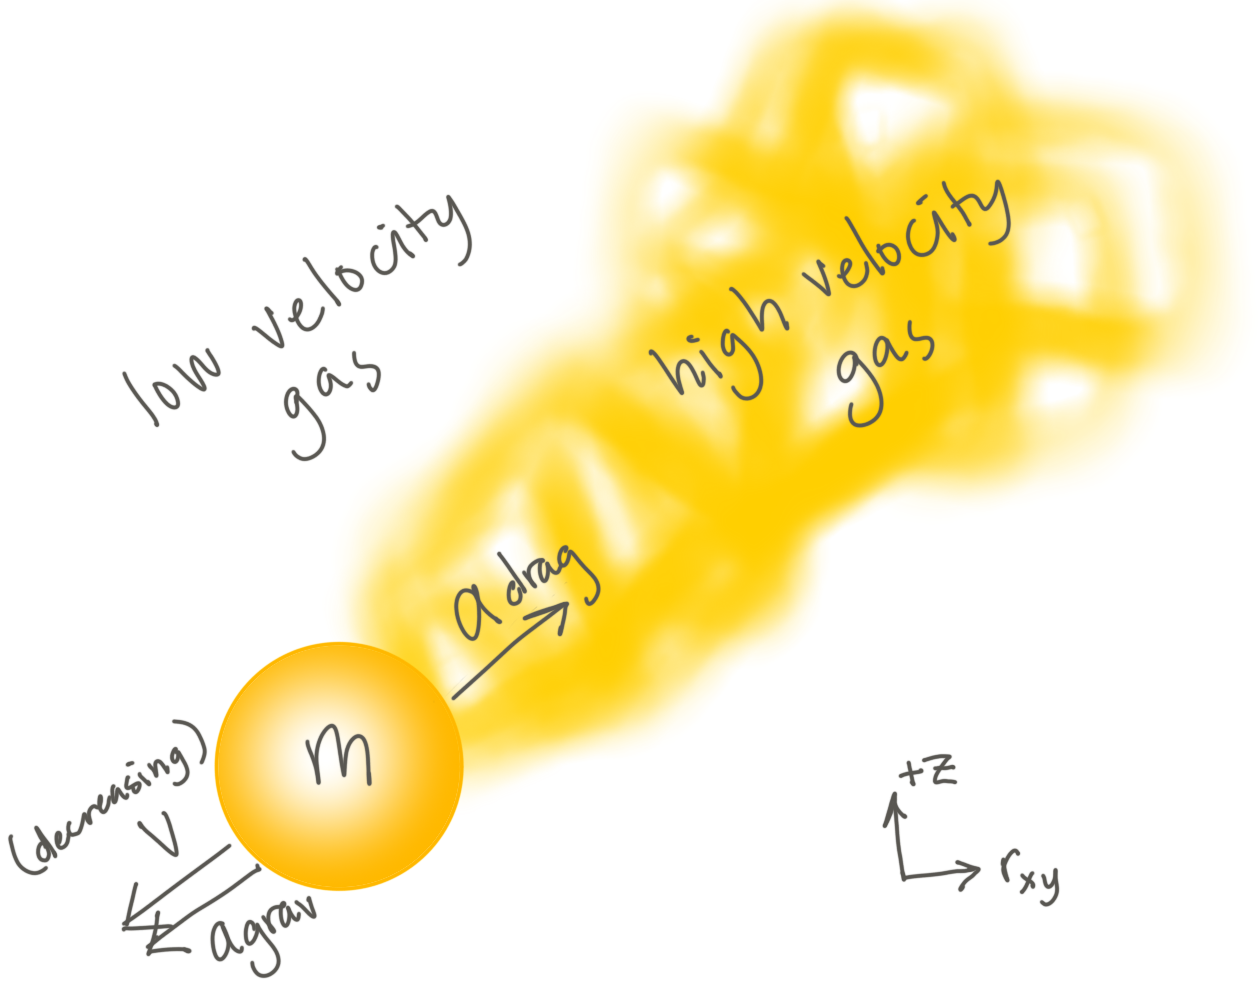

A droplet condenses at the photosphere of a synestia as it radiates heat into space. The droplet falls (towards the midplane of a synestia) into the interior, surrounded by gas. As gas drags on the droplet, the droplet spirals in towards the center of a synestia, losing velocity and distance from the rotational axis. The droplet transfers its angular momentum to the gas around it. The velocity of the gas increases in response. Since the droplet will always move faster than the gas, the increase in velocity will mean a smaller velocity differential between the gas and a droplet at the gas particle's location. It's too late for this to affect the first droplet that spiralled in, but if there were another droplet traveling behind the first droplet, the gas drag on the droplet would be weaker.

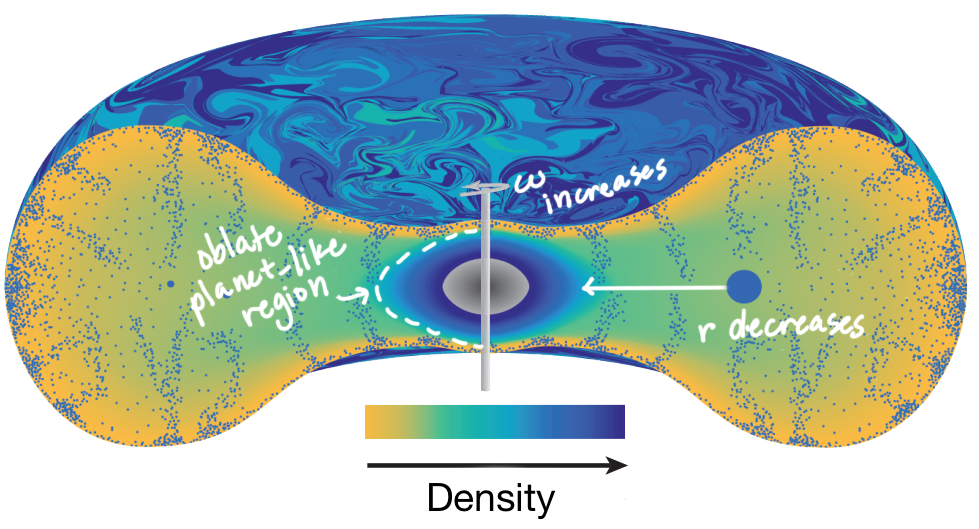

If a moonlet in the midplane spirals inward, and is not accreted by another moonlet or slowed by any means, the moonlet will reach the corotating planet-like region of a synestia and become part of the central planet-like mass. This is known as "falling onto the planet". As the planet-like spheroid's mass increases, its spin must increase to conserve angular momentum. As a synestia evolves through time, the corotating region will likely rotate at an increasingly faster rate as it accretes more mass from moonlets that could not escape their decaying orbtis.

## Decreasing the Angular Momentum of the Earth-Moon System

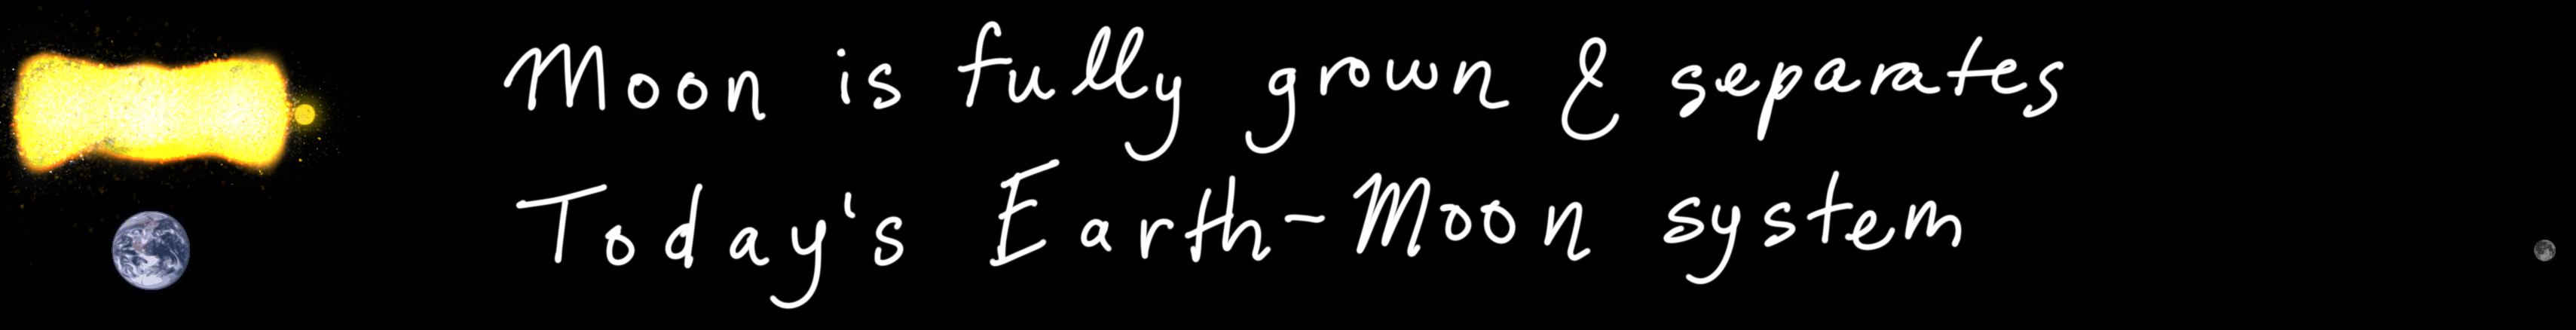

Credit: picture of today's Earth-Moon system from NASA

When a high-angular-momentum synestia cools enough that it transitions into a system consisting of a molten, rapidly-rotating (oblate) planet and a closely-orbiting, liquid moon, there are still a few steps to reach the Earth-Moon system we know of today.

The first you might be familiar with. Earth must cool over a long time period in order to form a solid crust. This will happen naturally, as heat radiates from the planet into space.

The second has to do with Earth's shape. Present-day Earth is nearly spherical with a slow rotation relative to that of an oblate synestia. Somehow, Earth's spin rate needs to slow. We'll get to this shortly.

The third has to do with the Moon. In present-day, the Moon is very far from Earth and continues to move farther away, whereas a synestia will form the Moon very close to early Earth. Due to tidal (gravitational) interactions between Earth and the Moon, the Moon will move away from Earth. Earth will slow its spin to transfer angular momentum to the Moon in order to increase the Moon's distance from Earth. Earth's length of day will increase with time as the Moon travels out to its current radial distance.

The fourth, simply, is that the excess angular momentum (relative to present-day angular momentum of the Earth-Moon system) has to be removed. You may be thinking, "Doesn't this violate conservation of angular momentum?" Not necessarily. If a mechanism can provide the means to transfer angular momentum to another system or body, then the angular momentum of one system may decrease, while the angular momentum of the other increases. This maintains conservation of angular momentum in the universe.

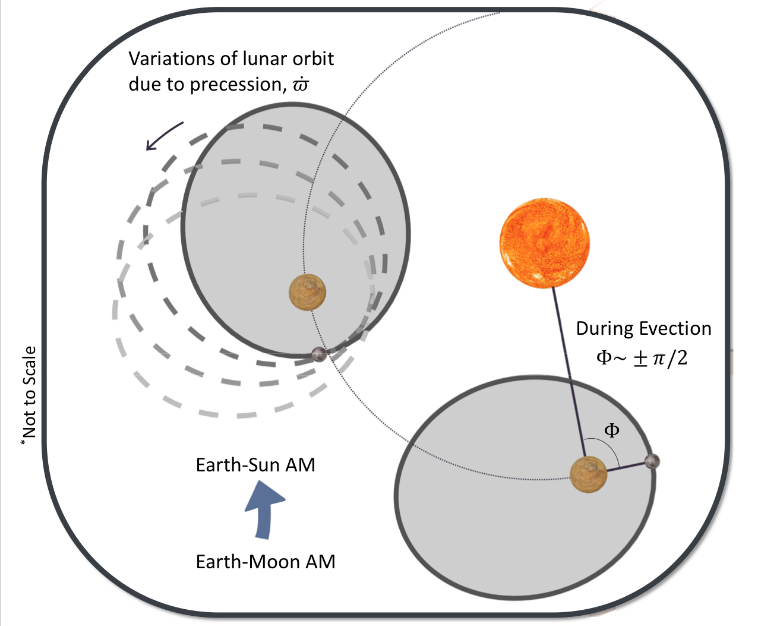

Credit: Rufu, R., and R.M. Canup (2019) Evection Resonance in the Earth-Moon System, Lunar and Planetary Science Conference.

A synestia must conserve its angular momentum if it is an isolated system, but a synestia is not one. Synestias are giant-impact-created planet- and moon- forming bodies that orbit their host star. Tidal (gravitational) interactions between a synestia and its moon(s) affect the star as well. The Earth-Moon system, freshly formed from a synestia with higher angular momentum than the present-day Earth-Moon system, can decrease its Earth-Moon system angular momentum by transferring it to its sun when the three body system is aligned just right (this is known as an <i>evection resonance</i>; Cuk and Stewart, 2012). This transfer will barely increase the rotation rate of the sun in response.

This transfer of angular momentum from the Earth-Moon system to the sun is important, because otherwise the hypothesis that a synestia with a bulk Earth composition formed the Earth-Moon system would not be plausible. Additionally, as a result of starting with higher angular momentum, there is a wide range of impact scenarios that can form a lunar mass out of a synestia, compared to the canonical model for lunar formation.